In [79]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


In [80]:
data = pd.read_csv("/Users/jarvis/pymycod/cintel/car_price_prediction.csv")
data.dropna()
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [81]:
data.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [82]:
print(f'old fuel type: {data["fueltype"].unique()}')
print(f'old aspiration: {data["aspiration"].unique()}')
print(f'old door number: {data["doornumber"].unique()}')
print(f'old car body: {data["carbody"].unique()}')
print(f'old drive wheel: {data["drivewheel"].unique()}')
print(f'old engine location: {data["enginelocation"].unique()}')
print(f'old engine type: {data["enginetype"].unique()}')
print(f'old cylinder number: {data["cylindernumber"].unique()}')
print(f'old fuel system: {data["fuelsystem"].unique()}')









old fuel type: ['gas' 'diesel']
old aspiration: ['std' 'turbo']
old door number: ['two' 'four']
old car body: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
old drive wheel: ['rwd' 'fwd' '4wd']
old engine location: ['front' 'rear']
old engine type: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
old cylinder number: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
old fuel system: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [83]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
data["fueltype"]= label_encoder.fit_transform(data["fueltype"])
data["aspiration"]= label_encoder.fit_transform(data["aspiration"])
data["doornumber"]= label_encoder.fit_transform(data["doornumber"])
data["carbody"]= label_encoder.fit_transform(data["carbody"])
data["drivewheel"]= label_encoder.fit_transform(data["drivewheel"])
data["enginelocation"]= label_encoder.fit_transform(data["enginelocation"])
data["enginetype"]= label_encoder.fit_transform(data["enginetype"])
data["cylindernumber"]= label_encoder.fit_transform(data["cylindernumber"])
data["fuelsystem"]= label_encoder.fit_transform(data["fuelsystem"])

  


In [84]:
print(f'new fuel type: {data["fueltype"].unique()}')
print(f'new aspiration: {data["aspiration"].unique()}')
print(f'new door number: {data["doornumber"].unique()}')
print(f'new car body: {data["carbody"].unique()}')
print(f'new drive wheel: {data["drivewheel"].unique()}')
print(f'new engine location: {data["enginelocation"].unique()}')
print(f'new engine type: {data["enginetype"].unique()}')
print(f'new cylinder number: {data["cylindernumber"].unique()}')
print(f'new fuel system: {data["fuelsystem"].unique()}')

new fuel type: [1 0]
new aspiration: [0 1]
new door number: [1 0]
new car body: [0 2 3 4 1]
new drive wheel: [2 1 0]
new engine location: [0 1]
new engine type: [0 5 3 2 6 4 1]
new cylinder number: [2 3 1 4 5 6 0]
new fuel system: [5 1 4 0 7 2 3 6]


/var/folders/g_/c4f93b1s3sb7z3s30n19hdzh0000gn/T/ipykernel_56519/1140609660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<AxesSubplot:>

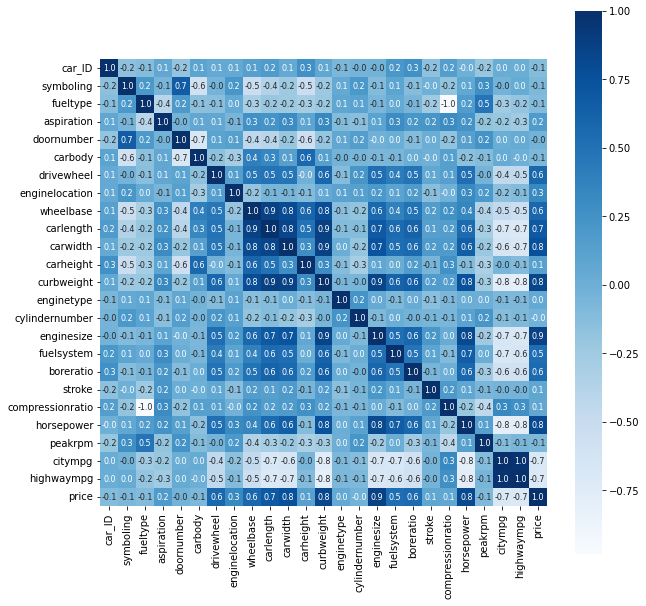

In [85]:
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')


In [86]:
x = data.drop(["CarName","car_ID","symboling","fueltype","doornumber","carbody","carheight","enginetype","cylindernumber","stroke","compressionratio","peakrpm"],axis =1)
y = data["price"]
data['price'].count()

205

In [87]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.25,random_state=3243)

In [88]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [89]:
model.score(X_test,Y_test)

1.0